In [1]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt

Si tienes algún error al ejecutar la celda anterior verifica que tu ambiente de anaconda tenga las librerías necesarias.

# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbors, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes. No trabajaremos directamente con las imágenes, existe un paso de pre-procesamiento que toma como entrada una imágen y devuelve un vector para la imágen, el vector puede ser considerado un vector de features que describen el contenido de la imágen. No nos preocuparemos de momento  por como se obtiene este vector o calcula exactamente, el pre-procesamiento ya fue dado.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [2]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [5]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle=True)


#  K-Nearest Neighbors

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [6]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [7]:
len(features)

10222

Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


C:\Users\PC\AppData\Local\Temp\ipykernel_13256\629895043.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imio.imread('./data/train/'+images_name[4]+'.jpg')


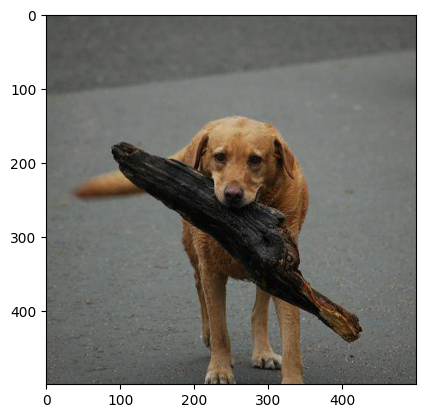

In [8]:
# Indice 4

print('Label: ',labels[4])

print('Nombre: ',images_name[4])

img = imio.imread('./data/train/'+images_name[4]+'.jpg')
plt.imshow(img)


### Implementa tu codigo de  K-Neighbors aqui:

El siguiente es un ejemplo de como puedes  definir tu función para predecir la raza sobre un punto x_predict ,a través de uscar los "k" vecinos mas cercanos en X_train y devolver como predicción el "y" que mas se repite(la moda) correspondiente a esos "k" valores de X_train , este "y" estará dado por Y_train. Debemos usar numpy a pesar de que se presenta un ejemplo de tensorflow.

Un ejemplo  de KNN en tensorflow: http://marubon-ds.blogspot.com/2017/09/knn-k-nearest-neighbors-by-tensorflow.html (este tiene diferencias, usar como guía no copiar literal, por ejemplo este usa una métrica de distancia diferente a la que debemos usar: distancia euclidiana )


#### Instrucciones:
1. Implementar KNN en la función predecir_raza_KNN usando numpy usando distancia euclidiana
2. Ejecutar el modelo con las 2 imagenes de prueba.

#### Tip
Algunas funciones útiles:
* np.sum(): sumar los elementos de un tensor.
* np.sqrt(): calcular la raíz cuadrada de los elementos de un tensor, por ejemplo usada en la fórmula de distancia euclídiana.
* np.argsort(): ordenar los elementos de un tensor y devolver las posiciones ordenadas, por ejemplo para ordenar las distancias.
* collections.Counter(): crear un contador(por ejemplo para contar cuantas ocurrencias hay para cada clase)

In [ ]:
from collections import Counter

def predecir_raza_KNN(x_predict,X_train,Y_train,k):

    distancias = np.sqrt(np.sum((X_train - x_predict) ** 2, axis=1))
    
    indices_k = np.argsort(distancias)[:k]

    etiquetas_k = Y_train[indices_k]
    
    return Counter(etiquetas_k).most_common(1)[0][0]


## Probamos el algoritmo con nuevas imagenes 

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [11]:
test_features = np.load('./data/test/test_inception_features_array.npy')

### Prueba 1

C:\Users\PC\AppData\Local\Temp\ipykernel_13256\1681883470.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_test = imio.imread('./data/test/test1.jpg')


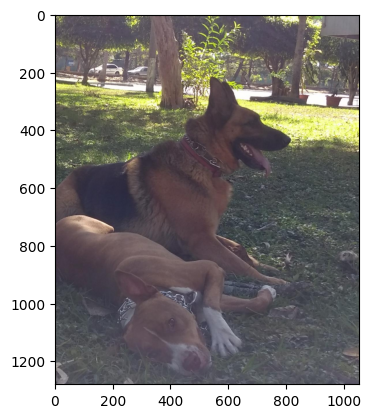

In [12]:
img_test = imio.imread('./data/test/test1.jpg')
plt.imshow(img_test)

In [20]:
predict_image = test_features[0]

## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: german_shepherd
predecir_raza_KNN(predict_image, features, labels, 10)

'german_shepherd'

### Prueba 2

C:\Users\PC\AppData\Local\Temp\ipykernel_13256\3034157317.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_test = imio.imread('./data/test/test2.jpg')


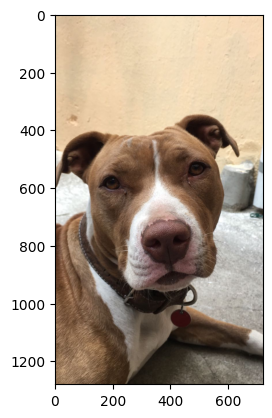

In [22]:
img_test = imio.imread('./data/test/test2.jpg')
plt.imshow(img_test)

In [23]:
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: american_staffordshire_terrier #
predict_image = test_features[1]
predecir_raza_KNN(predict_image, features, labels, 10)


'american_staffordshire_terrier'

### Implementa knn con sklearn para comparar tu implementación:

En esta sección utilizarás los mismos datos y realizaras el mismo proceso pero con la implementación de knn existente en sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. Acá se dá un ejemplo de knn usando sklearn(para datos ficticios dados), debemos usar código similar pero con el dataset de razas de perros

In [25]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) #entrenar el clasificador usando vecinos
neigh.fit(X, y)
print(neigh.predict([[1.1]])) #predicción de clase
print(neigh.predict_proba([[0.9]])) #predicción de probabilidad

[0]
[[0.66666667 0.33333333]]


In [49]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Evaluar el modelo con un conjunto de datos de prueba  

X = features
y = labels

neigh = KNeighborsClassifier(n_neighbors=20) #entrenar el clasificador usando vecinos
neigh.fit(X, y)

print(neigh.predict([test_features[0]])) #predicción de clase
print(neigh.predict_proba([test_features[0]])) #predicción de probabilidad


print(neigh.predict([test_features[1]])) #predicción de clase
print(neigh.predict_proba([test_features[1]])) #predicción de probabilidad

['german_shepherd']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['american_staffordshire_terrier']
[[0.   0.   0.   0.   0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0